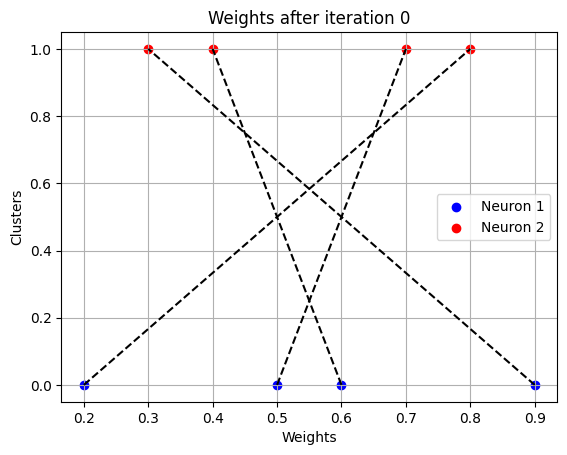

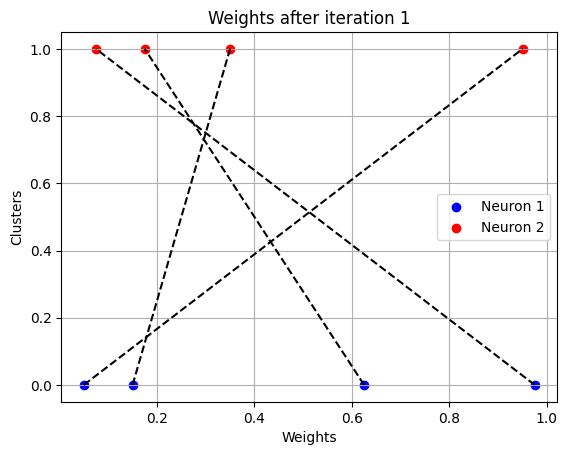

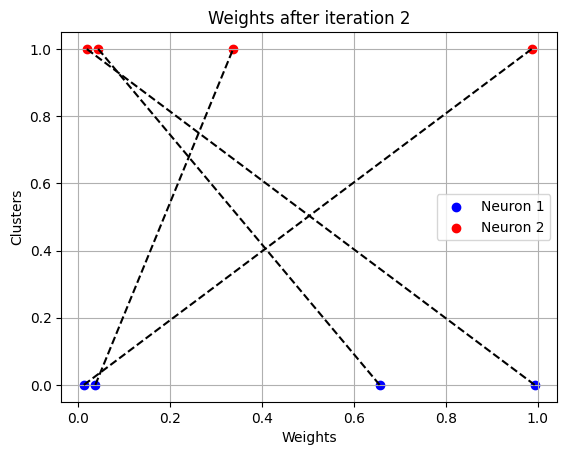

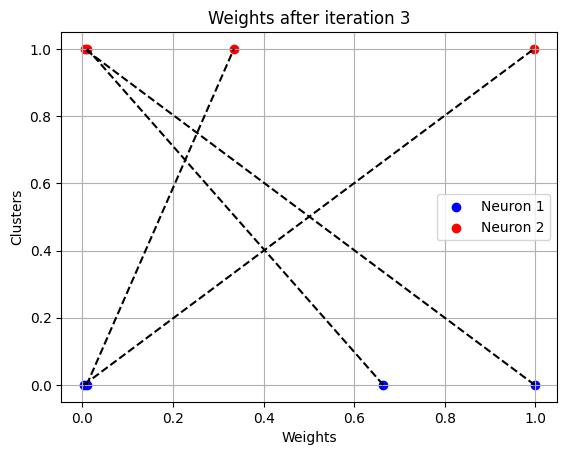

Test Sample s belongs to Cluster:  0
Final Trained Weights:  [[0.003125, 0.009375, 0.6640625, 0.9984375], [0.996875, 0.334375, 0.0109375, 0.0046875]]


In [3]:
import math
import matplotlib.pyplot as plt

class SOM:
    def winner(self, weights, sample):
        D0 = 0
        D1 = 0
        for i in range(len(sample)):
            D0 = D0 + math.pow((sample[i] - weights[0][i]), 2)
            D1 = D1 + math.pow((sample[i] - weights[1][i]), 2)

        if D0 < D1:
            return 0
        else:
            return 1

    def update(self, weights, sample, J, alpha):
        for i in range(len(weights[0])):
            weights[J][i] = weights[J][i] + alpha * (sample[i] - weights[J][i])
        return weights

def plot_weights(weights, iteration):
    plt.figure()
    plt.scatter(weights[0], [0] * len(weights[0]), color='blue', label='Neuron 1')
    plt.scatter(weights[1], [1] * len(weights[1]), color='red', label='Neuron 2')

    for i in range(len(weights[0])):
        plt.plot([weights[0][i], weights[1][i]], [0, 1], 'k--')

    plt.title(f"Weights after iteration {iteration}")
    plt.xlabel("Weights")
    plt.ylabel("Clusters")
    plt.legend()
    plt.grid()
    plt.show()

def main():

    T = [[1, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 1]]
    m, n = len(T), len(T[0])
    weights = [[0.2, 0.6, 0.5, 0.9], [0.8, 0.4, 0.7, 0.3]]

    ob = SOM()

    epochs = 3
    alpha = 0.5

    # Plot initial weights
    plot_weights(weights, 0)

    for i in range(epochs):
        for j in range(m):
            sample = T[j]
            J = ob.winner(weights, sample)
            weights = ob.update(weights, sample, J, alpha)

        # Plot weights after each epoch
        plot_weights(weights, i + 1)

    # Test the final weight on a new sample
    s = [0, 0, 0, 1]
    J = ob.winner(weights, s)

    print("Test Sample s belongs to Cluster: ", J)
    print("Final Trained Weights: ", weights)

if __name__ == "__main__":
    main()
